### Import Required Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 

### Movie Dataset

In [3]:
data = {
    'Movie': ['Inception', 'Avatar', 'Titanic', 'The Dark Knight', 'Avengers', 
              'Toy Story', 'Finding Nemo', 'Up', 'Joker', 'Frozen', 
              'Interstellar', 'Iron Man', 'Captain America', 'Doctor Strange', 'Coco'],
    'Genre_Score': [9, 8, 7, 9, 8, 6, 7, 6, 9, 7, 8, 7, 7, 8, 6],
    'User_Rating': [9.2, 8.8, 8.5, 9.1, 8.9, 8.0, 8.1, 8.2, 9.0, 8.3, 8.7, 8.4, 8.3, 8.5, 8.1],
    'Popularity_Score': [95, 98, 97, 94, 99, 85, 86, 83, 93, 88, 91, 90, 89, 87, 84]
}

df = pd.DataFrame(data)
df

,Movie,Genre_Score,User_Rating,Popularity_Score
0,Inception,9,9.2,95
1,Avatar,8,8.8,98
2,Titanic,7,8.5,97
3,The Dark Knight,9,9.1,94
4,Avengers,8,8.9,99
5,Toy Story,6,8.0,85
6,Finding Nemo,7,8.1,86
7,Up,6,8.2,83
8,Joker,9,9.0,93
9,Frozen,7,8.3,88


### Data Preprocessing

In [10]:
df.drop_duplicates(inplace=True)

# Extracting relevant features 
X = df.iloc[:, 1:].values

### Feature Selection and Normalization

In [11]:
features = ['Genre_Score', 'User_Rating', 'Popularity_Score']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

### K-Means Clustering with Elbow Method

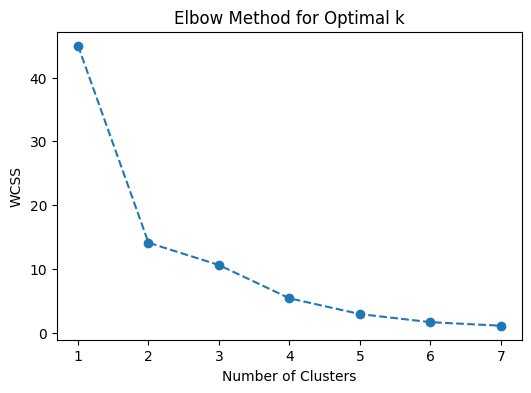

In [12]:
# Determine the optimal number of clusters using Elbow Method 
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters=i, random_state=42) 
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_) 
 
# Plot the Elbow graph 
plt.figure(figsize=(6, 4)) 
plt.plot(range(1, 8), wcss, marker='o', linestyle='--') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS') 
plt.title('Elbow Method for Optimal k') 
plt.show()

### Choose the optimal number of clusters where the "elbow" occurs. Let's say k=3.

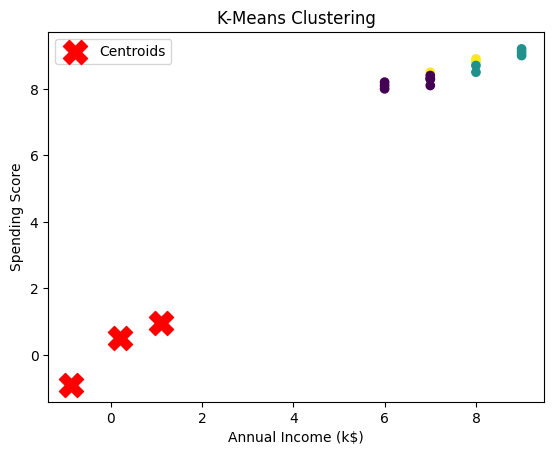

In [23]:
# Apply K-Means with optimal k 
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled) 
 
# Plot Clusters 
plt.scatter(X[:, 0], X[:, 1], c=df['KMeans_Cluster'], cmap='viridis') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  
            s=300, c='red', marker='X', label='Centroids') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.legend() 
plt.title('K-Means Clustering') 
plt.show() 

### Hierarchical Clustering

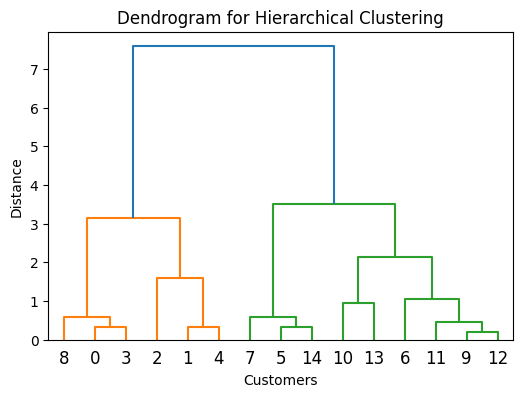

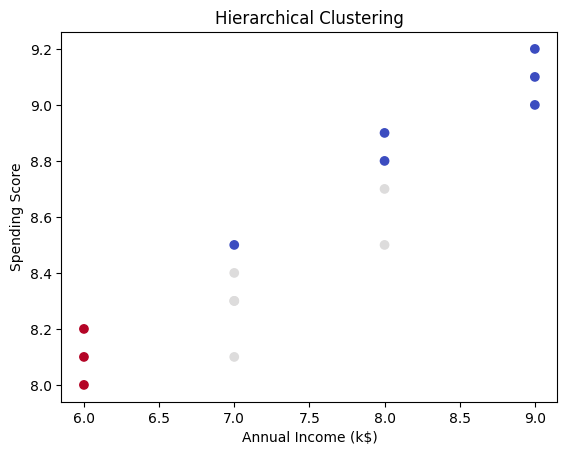

In [29]:
# Create Dendrogram 
plt.figure(figsize=(6, 4)) 
sch.dendrogram(sch.linkage(X_scaled, method='ward')) 
plt.title('Dendrogram for Hierarchical Clustering') 
plt.xlabel('Customers') 
plt.ylabel('Distance') 
plt.show() 
 
# Apply Hierarchical Clustering 
hc = AgglomerativeClustering(n_clusters=3) 
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled) 
 
# Plot Clusters 
plt.scatter(X[:, 0], X[:, 1], c=data['Hierarchical_Cluster'], cmap='coolwarm') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.title('Hierarchical Clustering') 
plt.show()

### DBSCAN Clustering

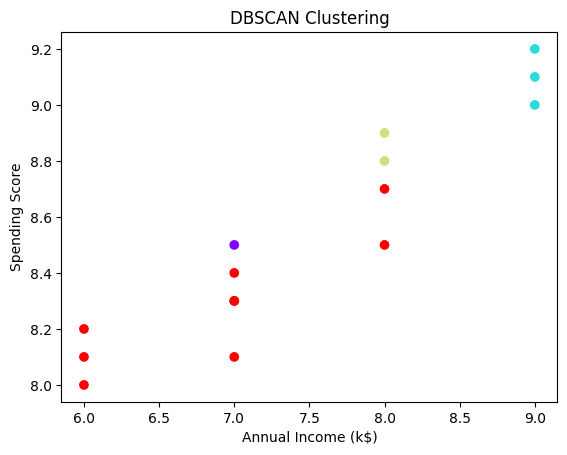

In [24]:
dbscan = DBSCAN(eps=1.2, min_samples=2) 
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled) 
 
# Plot Clusters 
plt.scatter(X[:, 0], X[:, 1], c=df['DBSCAN_Cluster'], cmap='rainbow') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score') 
plt.title('DBSCAN Clustering') 
plt.show() 

### PCA Visualization

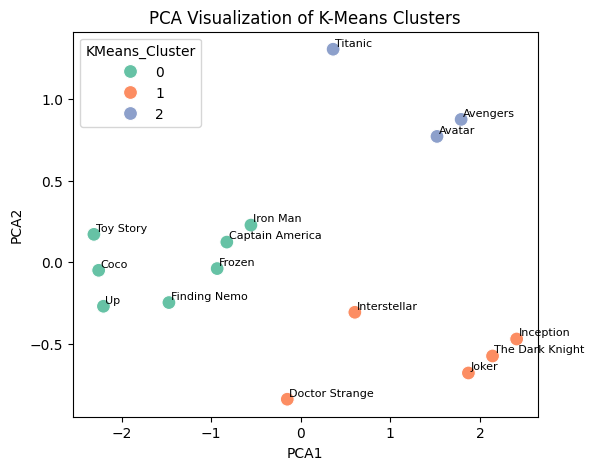

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

plt.figure(figsize=(6,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set2', s=100)
for i in range(len(df)):
    plt.text(df['PCA1'][i]+0.02, df['PCA2'][i]+0.02, df['Movie'][i], fontsize=8)
plt.title("PCA Visualization of K-Means Clusters")
plt.show()

###  t-SNE Visualization

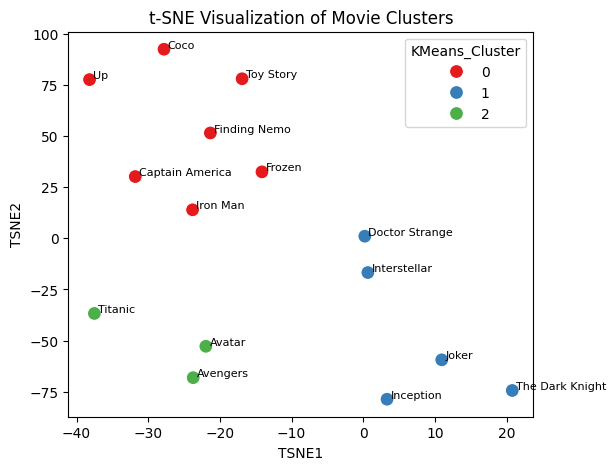

In [27]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
X_tsne = tsne.fit_transform(X_scaled)
df['TSNE1'], df['TSNE2'] = X_tsne[:, 0], X_tsne[:, 1]

plt.figure(figsize=(6,5))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', data=df, palette='Set1', s=100)
for i in range(len(df)):
    plt.text(df['TSNE1'][i]+0.5, df['TSNE2'][i]+0.5, df['Movie'][i], fontsize=8)
plt.title("t-SNE Visualization of Movie Clusters")
plt.show()

### Evaluate Clustering Performance

In [30]:
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
silhouette_hier = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
print("Silhouette Score - KMeans:", round(silhouette_kmeans, 3))
print("Silhouette Score - Hierarchical:", round(silhouette_hier, 3))

Silhouette Score - KMeans: 0.453
Silhouette Score - Hierarchical: 0.437


### Cluster Visualization and Insights

C:\Users\priya\AppData\Local\Temp\ipykernel_4320\123317286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KMeans_Cluster', data=df, palette='Set3')


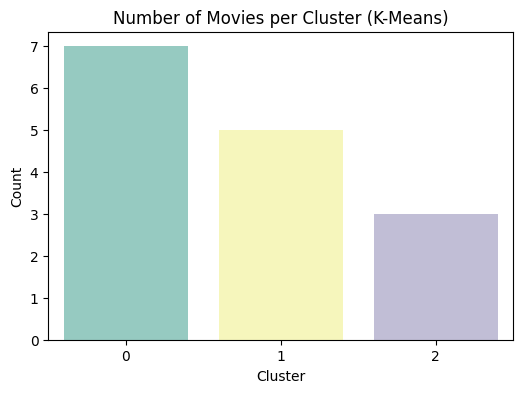

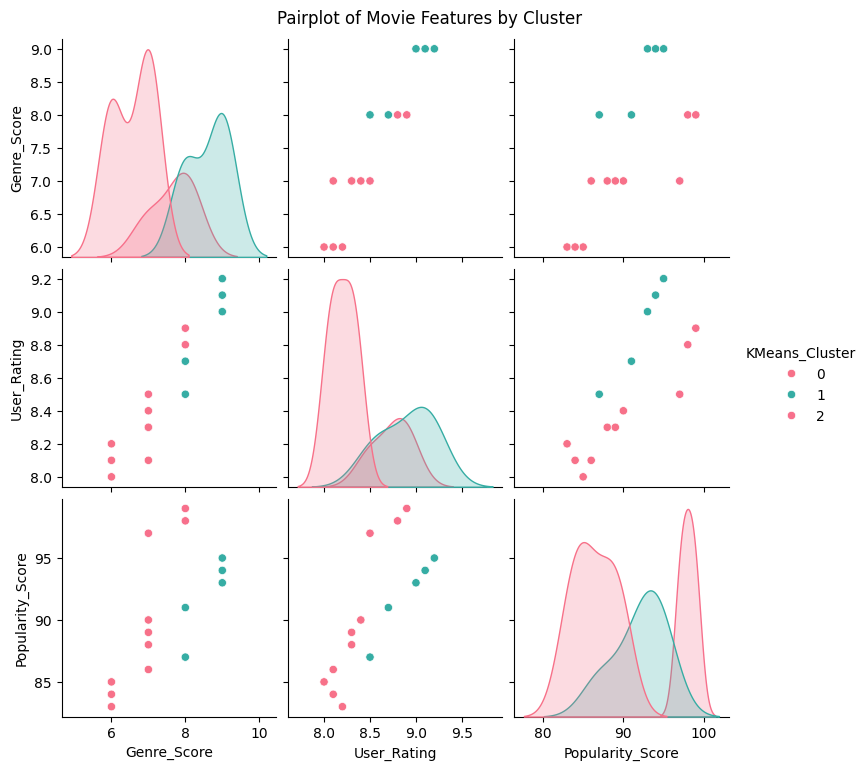

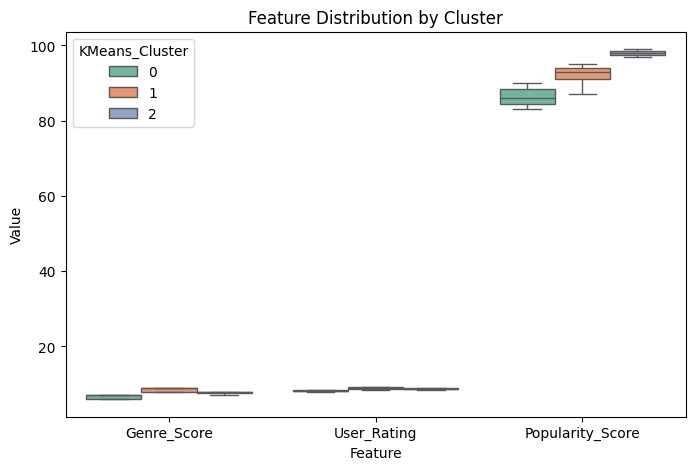

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='KMeans_Cluster', data=df, palette='Set3')
plt.title("Number of Movies per Cluster (K-Means)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Pairplot for deeper insight
sns.pairplot(df, vars=features, hue='KMeans_Cluster', palette='husl')
plt.suptitle("Pairplot of Movie Features by Cluster", y=1.02)
plt.show()

# Boxplot for feature comparison
plt.figure(figsize=(8,5))
df_melted = df.melt(id_vars=['KMeans_Cluster'], value_vars=features, var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='KMeans_Cluster', data=df_melted, palette='Set2')
plt.title("Feature Distribution by Cluster")
plt.show()

### Recommend Movies Based on Clusters

In [32]:
def recommend_movies(movie_name, cluster_label='KMeans_Cluster'):
    cluster = df.loc[df['Movie'] == movie_name, cluster_label].values[0]
    similar = df[df[cluster_label] == cluster]['Movie'].tolist()
    similar.remove(movie_name)
    return similar

movie_to_check = "Inception"
recommendations = recommend_movies(movie_to_check)
print(f"\nMovies similar to '{movie_to_check}':")
print(recommendations)


Movies similar to 'Inception':
['The Dark Knight', 'Joker', 'Interstellar', 'Doctor Strange']


### Final Cluster Summary

In [33]:
print("\nCluster Summary (K-Means):")
print(df[['Movie', 'KMeans_Cluster', 'Genre_Score', 'User_Rating', 'Popularity_Score']])


Cluster Summary (K-Means):
              Movie  KMeans_Cluster  Genre_Score  User_Rating  \
0         Inception               1            9          9.2   
1            Avatar               2            8          8.8   
2           Titanic               2            7          8.5   
3   The Dark Knight               1            9          9.1   
4          Avengers               2            8          8.9   
5         Toy Story               0            6          8.0   
6      Finding Nemo               0            7          8.1   
7                Up               0            6          8.2   
8             Joker               1            9          9.0   
9            Frozen               0            7          8.3   
10     Interstellar               1            8          8.7   
11         Iron Man               0            7          8.4   
12  Captain America               0            7          8.3   
13   Doctor Strange               1            8          8.5 